In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load the actual dataset from the "glass" sheet
df_glass = pd.read_excel('glass.xlsx', sheet_name="glass")

1. Exploratory Data Analysis (EDA):


Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

In [11]:
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [21]:
df_glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.


<Figure size 1200x800 with 0 Axes>

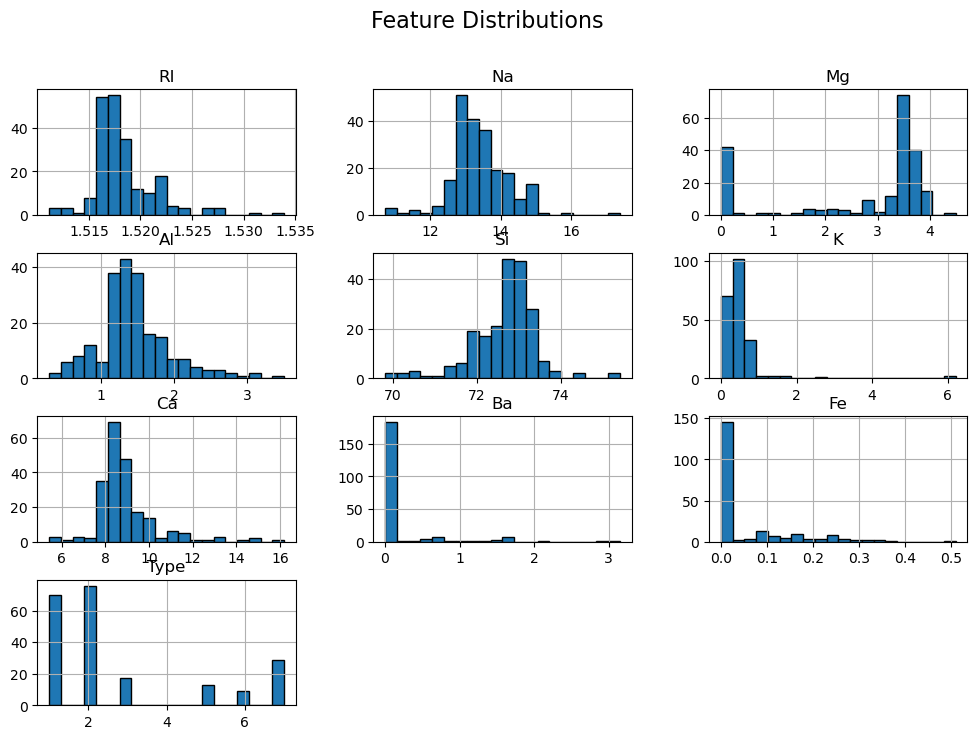

In [23]:
plt.figure(figsize=(12, 8))
df_glass.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

EDA Findings:

No missing values are present in the dataset.
    
The histograms show the distributions of numerical features. Some features, such as Mg, K ,Ba, and Fe, appear to have skewed distributions

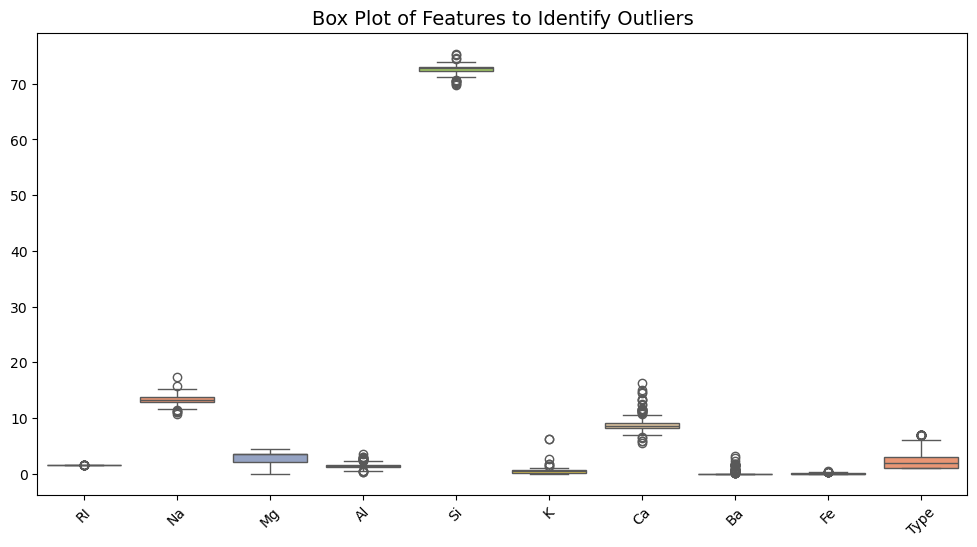

In [28]:
# Box plot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_glass, palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot of Features to Identify Outliers", fontsize=14)
plt.show()

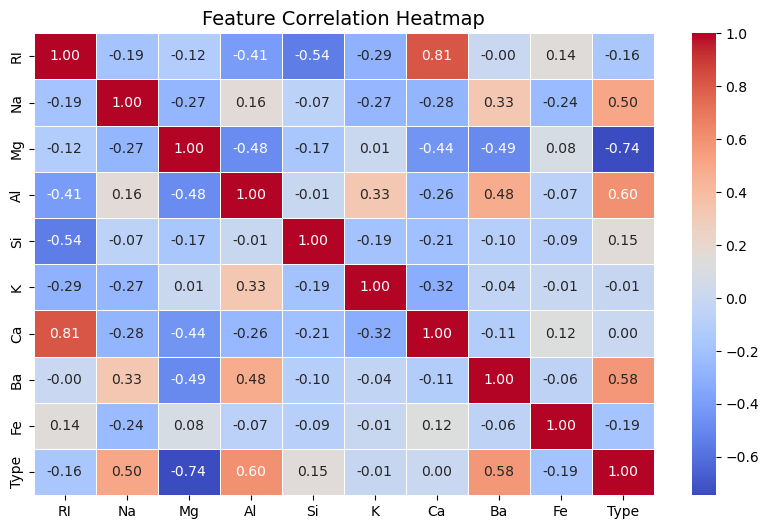

In [30]:
# Compute and visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_glass.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

Outlier and Correlation Analysis:

Outliers Detected:

The Mg, K, Ba, and Fe features contain several outliers.
        
Feature Correlation:

Strong positive correlations:

Ca and K (~0.81)

Al and RI (~0.6)

Strong negative correlations:

Si and Ca (~-0.76)

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.


In [41]:
# Handling outliers using IQR (Interquartile Range) method
Q1 = df_glass.quantile(0.25)
Q3 = df_glass.quantile(0.75)
IQR = Q3 - Q1

In [45]:
# Define outlier bounds (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [47]:
# Cap outliers within bounds
df_cleaned = df_glass.clip(lower=lower_bound, upper=upper_bound, axis=1)

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [49]:
# Feature Scaling using Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned.iloc[:, :-1])  # Exclude target column

In [51]:
#Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_glass.columns[:-1])
df_scaled['Type'] = df_glass['Type']  # Retain target variable

In [58]:
df_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091,1
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091,1
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091,1
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091,1
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091,1


4: Random Forest Model Implementation

1. Divide the data into train and test split.

In [63]:
# Split dataset into features (X) and target variable (y)
X = df_scaled.drop(columns=['Type'])
y = df_scaled['Type']

In [65]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

In [68]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# Predict on test data
y_pred = rf_model.predict(X_test)
y_pred

array([7, 5, 2, 5, 1, 2, 2, 2, 1, 1, 3, 1, 7, 6, 1, 7, 7, 1, 1, 2, 1, 1,
       7, 2, 1, 3, 2, 6, 2, 1, 2, 1, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2, 7],
      dtype=int64)

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [76]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [78]:
accuracy

0.7674418604651163

In [80]:
classification_rep

'              precision    recall  f1-score   support\n\n           1       0.76      0.93      0.84        14\n           2       0.77      0.67      0.71        15\n           3       1.00      0.67      0.80         3\n           5       1.00      0.67      0.80         3\n           6       0.50      0.50      0.50         2\n           7       0.71      0.83      0.77         6\n\n    accuracy                           0.77        43\n   macro avg       0.79      0.71      0.74        43\nweighted avg       0.78      0.77      0.76        43\n'

5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.

In [88]:
# Bagging with Decision Trees
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

In [96]:
# Boosting using AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

In [98]:
# Boosting using Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [100]:
# Evaluate models
bagging_acc = accuracy_score(y_test, y_pred_bagging)
adaboost_acc = accuracy_score(y_test, y_pred_adaboost)
gb_acc = accuracy_score(y_test, y_pred_gb)

In [102]:
bagging_acc

0.7441860465116279

In [104]:
adaboost_acc

0.5116279069767442

In [106]:
gb_acc

0.7674418604651163

Bagging vs. Boosting Performance Comparison

Random Forest Accuracy: 76.7%

Bagging Accuracy: 74.4%

AdaBoost Accuracy: 51.1%

Gradient Boosting Accuracy: 76.7%

Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating)

Trains multiple independent models on random subsets of data.
    
Averages predictions to reduce variance.

Example: Random Forest (a bagging-based ensemble method).
Boosting

Trains models sequentially, with each model correcting previous mistakes.
    
Focuses more on misclassified data points.

Examples: AdaBoost, Gradient Boosting, XGBoost.

2. Explain how to handle imbalance in the data.

Handling Imbalanced Data:

Oversampling: Duplicate minority class examples.

Undersampling: Remove majority class examples.

SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic examples for the minority class.
    
Class Weights: Adjust model weights to give more importance to minority classes.